0.6935201169311767
0.723812435009591
0.7270175440570921
0.7114618767270193
0.702440310277811
0.6984369773441592
0.6935656111499906
0.6731217580201203
0.6242598713705093
0.5542104057488028


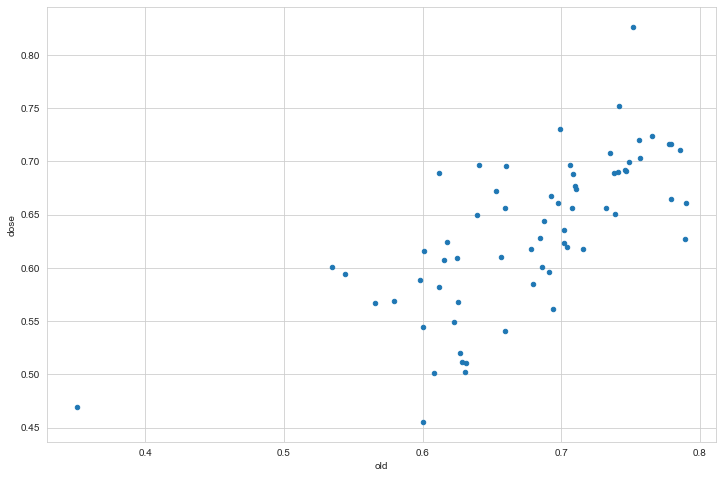

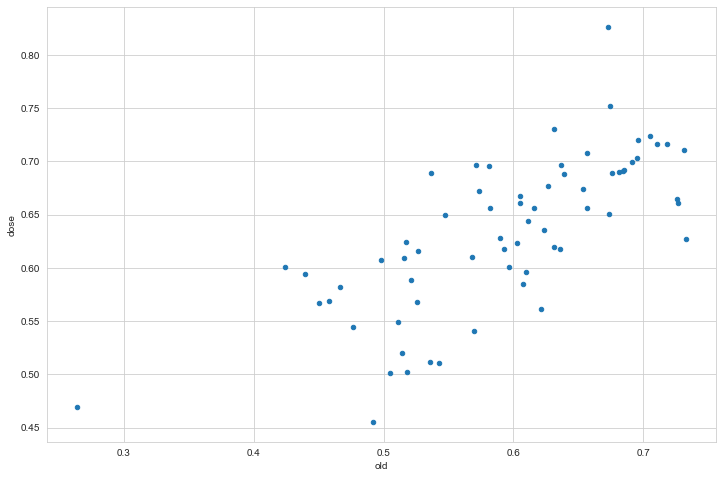

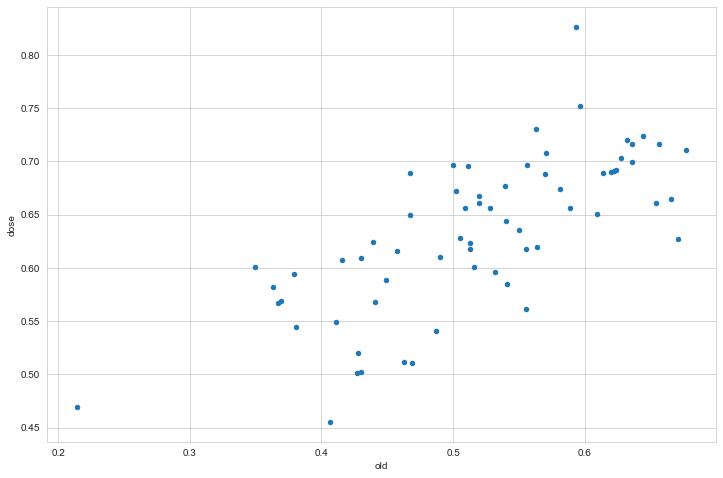

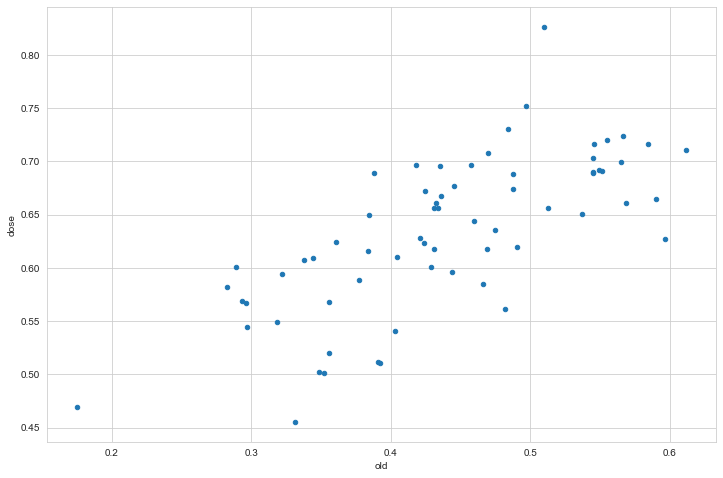

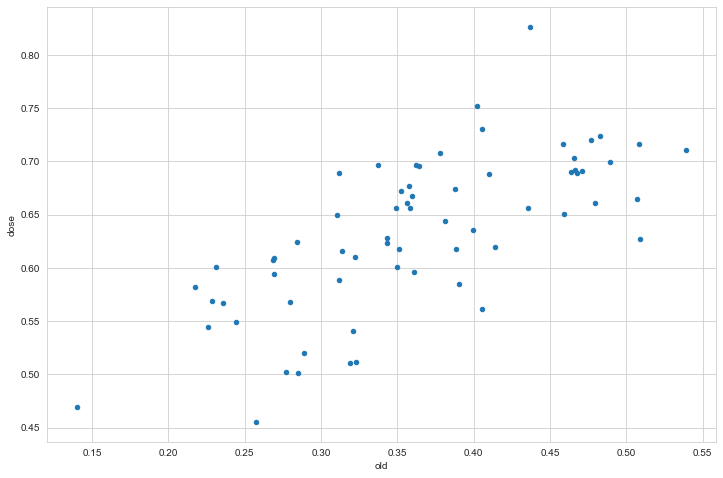

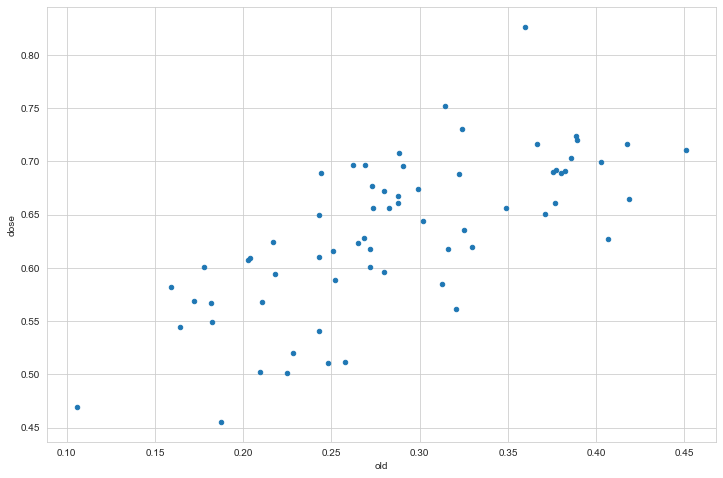

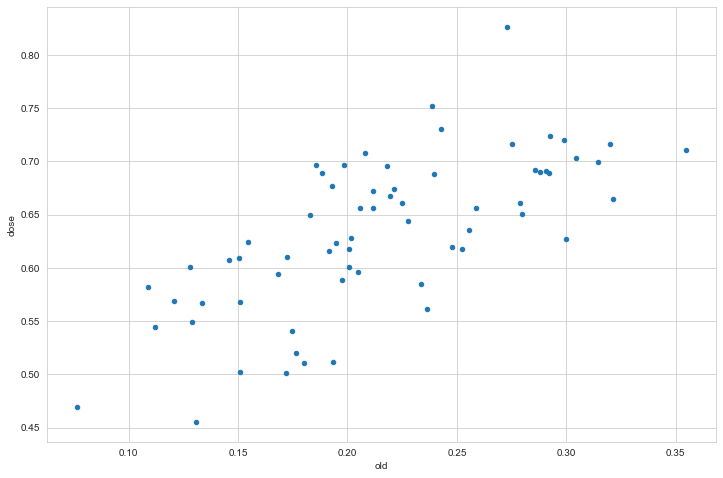

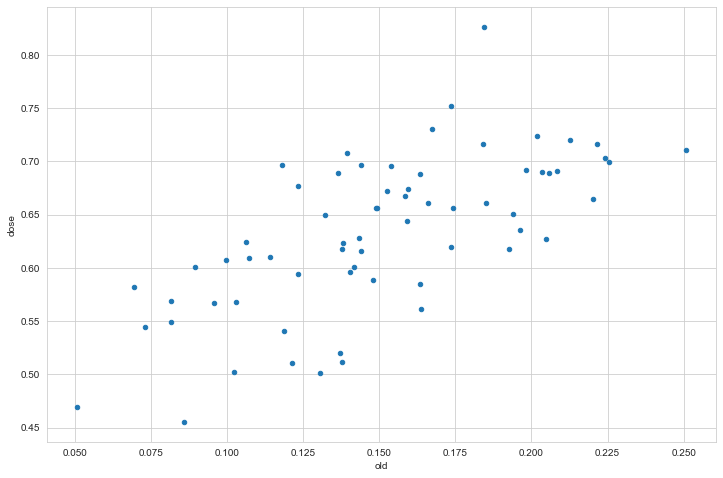

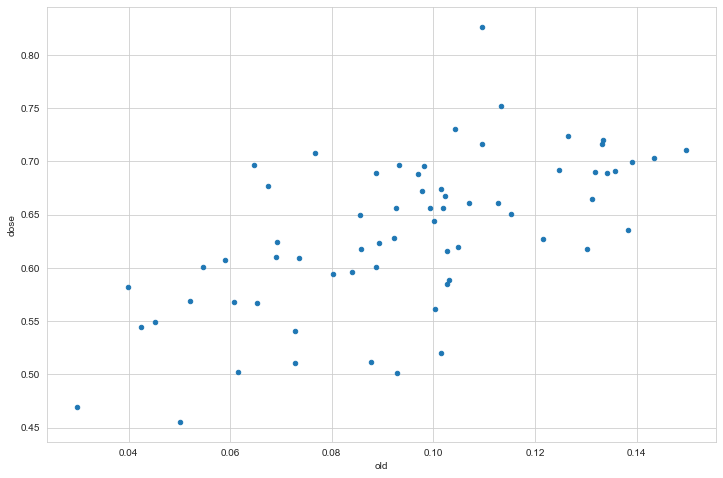

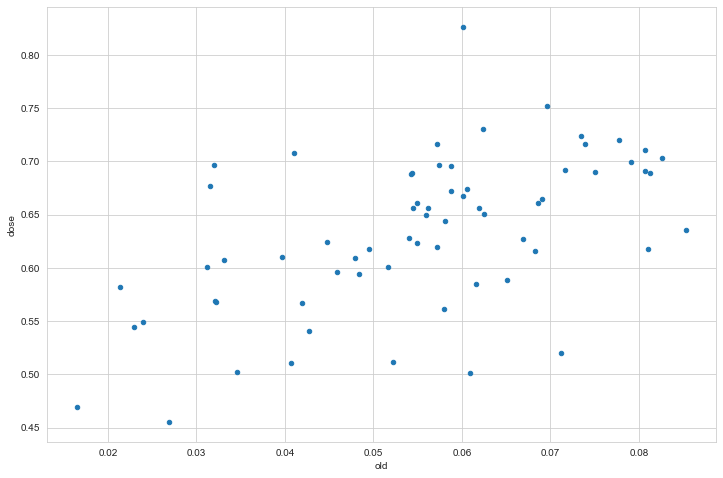

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

data_dose = pd.read_excel("sa3.xlsx", usecols=[1,2,6], names=["code", "name", "dose"])
data_dose["dose"] = data_dose["dose"].apply(lambda x: x if type(x) == float else .96)

data_income = pd.read_csv("income.csv", skiprows=11, skipfooter=11, engine="python",
                          usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
                          names=["name", "negative", "nil", "1-149", "150-299", "300-399",
                                 "400-499", "500-649", "650-799", "800-999", "1000-1249", 
                                 "1250-1499", "1500-1749", "1750-1999", "2000-2999", "3000+", "na"], index_col="name")

midpoints = []
for i, col in enumerate(data_income):    
    if "-" in col:
        midpoints.append((float(col.split("-")[0]) + float(col.split("-")[1])) / 2)
    elif col == "3000+":
        midpoints.append(3500)
    else:
        midpoints.append(0)

cols = data_income.columns
for sa3 in data_income.index:    
    incomes = []
    for i, col in enumerate(cols):
        incomes = incomes + [midpoints[i]] * data_income.at[sa3, col]
    data_income.at[sa3, "median"] = np.median(incomes)

data_age = pd.read_csv("ages.csv", usecols=[5,8,14], skiprows=1, names=["cohort", "code", "value"])
data_age = data_age[data_age["cohort"] != "All ages"]

# pick state
for age in [30, 35, 40, 45, 50, 55, 60, 65, 70, 75]:
    data_test = data_dose[data_dose["code"].apply(lambda x: str(x)[0] == "2")]
    for i in data_test.index:
        data_test.at[i, "median"] = data_income.loc[data_test.at[i, "name"]]["median"]
        temp_data = data_age[(data_age["code"] == data_test.at[i, "code"])]
        data_test.at[i, "pop"] = temp_data[temp_data["cohort"].apply(lambda x: True if (x == "85 and over") or (float(x.split("-")[0]) > 14) else False)]["value"].sum()
        data_test.at[i, "oldies"] = temp_data[temp_data["cohort"].apply(lambda x: True if (x == "85 and over") or (float(x.split("-")[0]) > age) else False)]["value"].sum()
    data_test.loc[:, "old"] = data_test.loc[:, "oldies"] / data_test.loc[:, "pop"]
    data_test.plot.scatter(figsize=(12, 8), x="old", y="dose");
    r = np.corrcoef(np.array(data_test["dose"]), np.array(data_test["old"]))
    print(r[0, 1])